<a href="https://colab.research.google.com/github/Anweshasen98/-Classifier-to-Surpass-LeNet/blob/main/Custom_MNIST_Classifier_that_beat_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Custom MNIST Classifier that beat LeNet.ipynb

*   List item
*   List item



In [ ]:
import tensorflow as tf


In [ ]:
# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
#from keras.utils import to_categorical

# Convert labels to categorical format

#y_train = to_categorical(y_train,10)
#y_test = to_categorical(y_test,10)

In [ ]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy")> ACCURACY_THRESHOLD):
      print("\nReached %2.2f%% accuracy so cancelling training!" % (ACCURACY_THRESHOLD*100))
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()

In [ ]:
# define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# train the model

ACCURACY_THRESHOLD =  .995

training = model.fit(X_train, y_train, epochs=100, batch_size= 32 , validation_split=0.1,
                     callbacks=[callbacks])

Epoch 1/100
1688/1688 [==============================] - 16s 4ms/step - loss: 0.2298 - accuracy: 0.9310 - val_loss: 0.0493 - val_accuracy: 0.9840
Epoch 2/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0880 - accuracy: 0.9745 - val_loss: 0.0406 - val_accuracy: 0.9873
Epoch 3/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0658 - accuracy: 0.9804 - val_loss: 0.0316 - val_accuracy: 0.9913
Epoch 4/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0512 - accuracy: 0.9849 - val_loss: 0.0342 - val_accuracy: 0.9910
Epoch 5/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0421 - accuracy: 0.9873 - val_loss: 0.0307 - val_accuracy: 0.9917
Epoch 6/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0380 - accuracy: 0.9877 - val_loss: 0.0325 - val_accuracy: 0.9913
Epoch 7/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0333 - val_a

# PERFORMANCE EVALUATION

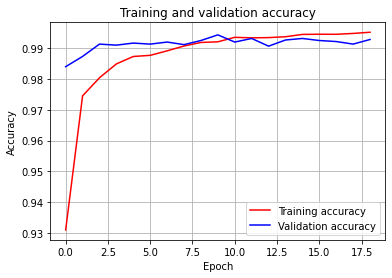

<Figure size 432x288 with 0 Axes>

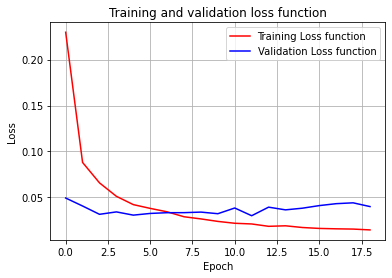

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Training and Testing curves

import matplotlib.pyplot as plt

history = training.history

def summarize_diagnostics(history):
  acc = history['accuracy']
  loss = history['loss']
  val_acc = history['val_accuracy']
  val_loss = history['val_loss']

  epochs = range(len(acc))


  plt.grid()
  plt.plot(acc, 'r', label='Training accuracy')
  plt.plot(val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.figure()
  plt.show()

  plt.grid()
  plt.plot(loss, 'r', label='Training Loss function')
  plt.plot(val_loss, 'b', label='Validation Loss function')
  plt.title('Training and validation loss function')
  plt.legend(loc=0)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.figure()
  plt.show()


summarize_diagnostics(history)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss : {loss}, \nAccuracy: {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0353 - accuracy: 0.9927
Loss : 0.0353388749063015, 
Accuracy: 0.9926999807357788


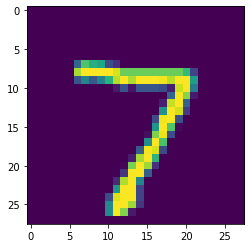

In [ ]:
plt.imshow(X_test[0])

In [ ]:
#PREDICT

classification = model.predict(X_test)
classification[0]

313/313 [==============================] - 1s 1ms/step


array([2.8704886e-21, 1.0005698e-20, 1.6300398e-17, 3.8540859e-20,
       4.7216670e-23, 5.1195929e-24, 5.4657872e-32, 1.0000000e+00,
       2.2455022e-23, 1.3670041e-16], dtype=float32)

In [ ]:
import numpy as np
np.argmax(classification[0])

7

In [ ]:
y_pred = []

for i in classification:
    y_pred.append(np.argmax(i))

y_pred[:5]

[7, 2, 1, 0, 4]

In [ ]:
pred=[np.argmax(i) for i in classification]

pred[ :5]

[7, 2, 1, 0, 4]

In [ ]:
import math
cm=tf.math.confusion_matrix(y_test, y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 979,    0,    0,    1,    0,    0,    0,    0,    0,    0],
       [   0, 1133,    1,    1,    0,    0,    0,    0,    0,    0],
       [   1,    0, 1026,    0,    0,    0,    0,    5,    0,    0],
       [   0,    0,    1, 1005,    0,    3,    0,    0,    1,    0],
       [   0,    0,    1,    0,  968,    0,    2,    0,    0,   11],
       [   0,    0,    0,    6,    0,  883,    1,    1,    0,    1],
       [   3,    2,    1,    0,    1,    3,  948,    0,    0,    0],
       [   0,    1,    2,    0,    0,    0,    0, 1024,    1,    0],
       [   3,    0,    2,    1,    0,    1,    1,    1,  963,    2],
       [   1,    0,    0,    0,    1,    6,    0,    3,    0,  998]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

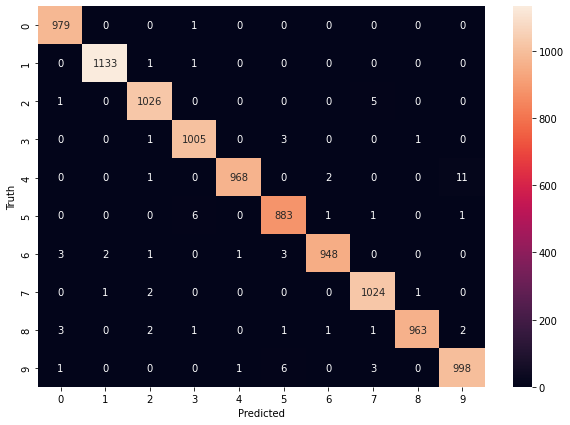

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')